Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

Данные лежат на google диске по [ссылке](https://drive.google.com/file/d/1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ/view?usp=sharing).

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [2]:
males = (df['gender'] == 'Male').sum()
females = (df['gender'] == 'Female').sum()

print(f'{males} к {females} (в процентах: {round(100 * males / (males + females), 2)}% '
                                      f'к {round(100 * females / (males + females), 2)}%)')

3555 к 3488 (в процентах: 50.48% к 49.52%)


##### 2. Какое количество уникальных значений у поля InternetService?

In [3]:
df['InternetService'].unique().shape[0]

3

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [4]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

Тип поля: object (в данном случае строка) и среди значений есть "_" (пробел), который невозможно конвертировать в число для подсчета выше перечисленных статистик.

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [5]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0}).astype('i1')

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [6]:
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = np.nan
df['TotalCharges'] = df['TotalCharges'].astype('float32').fillna(0)

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [7]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype('i1')

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [8]:
df[['StreamingMovies', 'StreamingTV', 'TechSupport']] = df[['StreamingMovies', 'StreamingTV', 'TechSupport']]\
                                                        .replace(('Yes', 'No', 'No internet service'), (1, 0, 0)).astype('i1')

##### 8. Заполните пропуски в поле PhoneService значением 0

In [9]:
(~df['PhoneService'].isin([1, 0])).sum()

0

В поле PhoneService нет пропусков, только значения 1 и 0.

##### 9. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [10]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']

df = df[columns]
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.850000,0,0,0,0
1,Male,34,1,1889.500000,0,0,0,0
2,Male,2,1,108.150002,0,0,0,1


##### 10. Разделите датасет на тренировочную и тестовую выборку.

In [11]:
from sklearn import model_selection

In [12]:
features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'

X_train, X_test, y_train, y_test = model_selection.train_test_split(df[features], df[target], test_size=0.3, random_state=23)

##### 11. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([('gender_selector', ColumnSelector('gender')),
                   ('gender_ohe', OHEncoder('gender'))],
                  verbose=True)

##### 12. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [14]:
gender.fit_transform(X_train)

[Pipeline] ... (step 1 of 2) Processing gender_selector, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing gender_ohe, total=   0.0s


,gender_Female,gender_Male
3899,1,0
4762,0,1
562,0,1
493,0,1
3397,1,0
...,...,...
2998,0,1
1993,1,0
1064,1,0
4838,1,0


##### 13. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

Стандартизация необходима для качественного обучения модели при разных масштабах признаков.

In [15]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

##### 14. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [16]:
TotalCharges =  Pipeline([
                    ('selector', NumberSelector(key='TotalCharges')),
                    ('standard', StandardScaler())
                ])

Объединение всех "кубиков" очень легко сделать таким образом

In [17]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies',
                                                 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [18]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(random_state=23)),
])

pipeline.fit(X_train, y_train)

[Pipeline] ... (step 1 of 2) Processing gender_selector, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing gender_ohe, total=   0.0s


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 15. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [20]:
pred_probas = pipeline.predict_proba(X_test)
pred_probas

array([[0.91, 0.09],
       [1.  , 0.  ],
       [0.54, 0.46],
       ...,
       [0.72, 0.28],
       [0.45, 0.55],
       [1.  , 0.  ]])

##### 16. Посчитайте метрики качества получившейся модели (roc_auc)

roc auc score: 0.7724739793321885


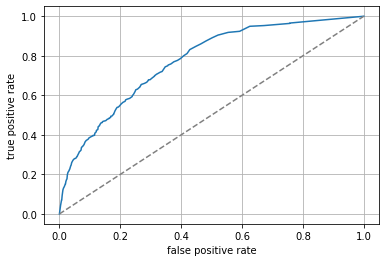

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print(f'roc auc score: {roc_auc_score(y_test, pred_probas[:, 1])}')

fpr, tpr, tresholds = roc_curve(y_test, pred_probas[:, 1])

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.plot((0, 1), (0, 1), '--', c='grey')
plt.grid()

### Сохраним наш пайплайн

In [22]:
import pickle
with open("model_RF.pickle", "wb") as f:
    pickle.dump(pipeline, f)